In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load datasets
train_path = 'train.csv'
test_path = 'test.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Print shape before preprocessing
print("Train Dataset Shape Before Preprocessing:", train_df.shape)
print("Test Dataset Shape Before Preprocessing:", test_df.shape)

# Display basic info
print("Train Dataset Info:")
print(train_df.info())
print("\nTest Dataset Info:")
print(test_df.info())

# Handling missing values (only for numeric columns)
numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())
test_df[numeric_cols] = test_df[numeric_cols].fillna(test_df[numeric_cols].median())

# Encoding categorical variables
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    if col in test_df.columns:
        test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

# Feature scaling
scaler = StandardScaler()
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

# Print shape after preprocessing
print("Train Dataset Shape After Preprocessing:", train_df.shape)
print("Test Dataset Shape After Preprocessing:", test_df.shape)

# Save preprocessed data
# Save preprocessed data
train_df.to_csv('preprocessed_train.csv', index=False)
test_df.to_csv('preprocessed_test.csv', index=False)

print("Preprocessing completed. Processed files saved.")


Train Dataset Shape Before Preprocessing: (103904, 25)
Test Dataset Shape Before Preprocessing: (25976, 25)
Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.ensemble import RandomForestClassifier

# Load preprocessed datasets
train_path = 'preprocessed_train.csv'

train_df = pd.read_csv(train_path)



In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

Accuracy: 0.9428703418540191
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14573
           1       0.95      0.92      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



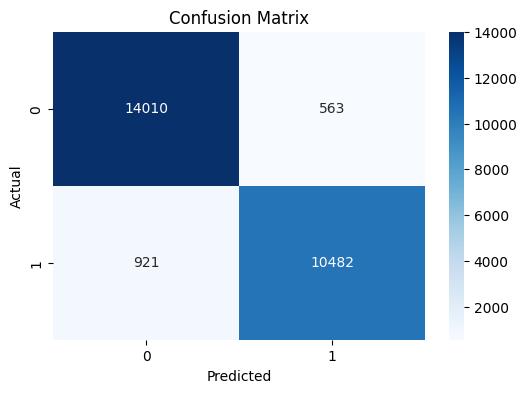

In [22]:
columns_to_drop = [
    'Unnamed: 0', 'Food and drink', 'Gender', 'Baggage handling',
    'Ease of Online booking', 'Gate location', 'Cleanliness',
    'On-board service', 'Customer Type', 'Departure/Arrival time convenient',
    'Inflight service', 'Departure Delay in Minutes', 'Checkin service', 'satisfaction'
]

# Filter to only include columns that actually exist
columns_to_drop = [col for col in columns_to_drop if col in train_df.columns]

#Corrected line.
X_train = train_df.drop(columns=columns_to_drop, axis=1)
y_train = train_df['satisfaction']

# Separate features and target in test data
columns_to_drop_test = [col for col in columns_to_drop if col in test_df.columns]
X_test = test_df.drop(columns=columns_to_drop_test, axis=1)
y_test = test_df['satisfaction']

# Standardize numerical features (fit on training data only, transform both)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

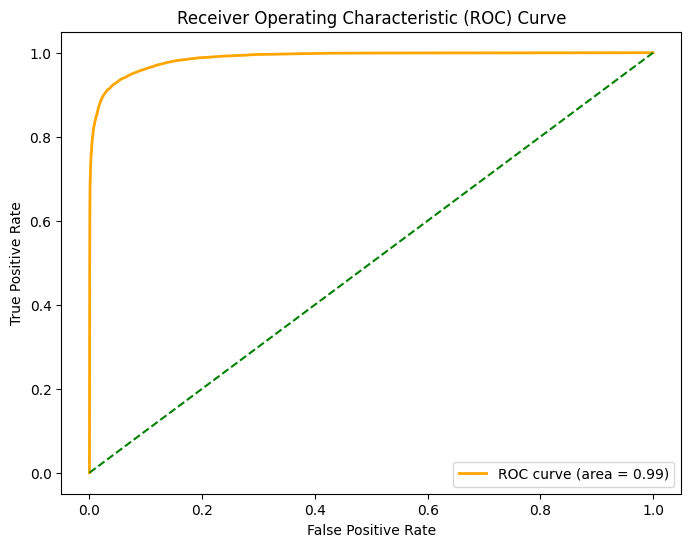

In [11]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier


# Identify categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

# Remove 'satisfaction' from categorical_cols if it's there
if 'satisfaction' in categorical_cols:
    categorical_cols.remove('satisfaction')

# Create label encoders for each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col]) #Transform the test data using the fitted encoder.
    label_encoders[col] = le

# Separate features and target
X = train_df.drop(columns=columns_to_drop, axis=1)
y = train_df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0) 
X_test =test_df.drop(columns=columns_to_drop, axis=1)
y_test = test_df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_scaled, y)

def predict_satisfaction():
    # Define the new customer data (example)
    new_customer = {
        'Gender': 'Male', 'Customer Type': 'Loyal Customer', 'Age': 30, 'Type of Travel': 'Business travel', 'Class': 'Business',
        'Flight Distance': 1000, 'Inflight wifi service': 4, 'Departure/Arrival time convenient': 3, 'Ease of Online booking': 4,
        'Gate location': 2, 'Food and drink': 5, 'Online boarding': 4, 'Seat comfort': 5, 'Inflight entertainment': 4,
        'On-board service': 5, 'Leg room service': 4, 'Baggage handling': 5, 'Checkin service': 3, 'Inflight service': 4,
        'Cleanliness': 5, 'Departure Delay in Minutes': 10, 'Arrival Delay in Minutes': 5
    }

    # Convert the customer data to a DataFrame
    new_data_df = pd.DataFrame([new_customer])

    # Add any missing columns that are in X.columns
    for col in X.columns:
        if col not in new_data_df.columns:
            new_data_df[col] = 0  # Add with default value

    # Handle categorical columns using label encoders
    for col in categorical_cols:
        if col in new_data_df.columns:
            value = new_data_df[col].iloc[0]
            if isinstance(value, str):  # Only transform string values
                if value not in label_encoders[col].classes_:
                    # If the value isn't in the encoder's known classes, use the default
                    new_data_df.loc[0, col] = label_encoders[col].transform([label_encoders[col].classes_[0]])[0]
                else:
                    # Otherwise transform it properly
                    new_data_df.loc[0, col] = label_encoders[col].transform([value])[0]

    # Ensure the column order matches the training data
    new_data_df = new_data_df[X.columns]

    # Make sure all data is numeric
    for col in new_data_df.columns:
        new_data_df[col] = pd.to_numeric(new_data_df[col], errors='coerce')

    # Fill any NaN values that might have been created
    new_data_df = new_data_df.fillna(0)

    # Scale the data using the previously fitted scaler
    new_data_scaled = scaler.transform(new_data_df)

    # Predict the satisfaction class (numeric value)
    prediction = clf.predict(new_data_scaled)

    # Map numeric predictions to satisfaction labels
    satisfaction_labels = {0: "neutral or dissatisfied", 1: "Satisfied"}
    print("Predicted Satisfaction:", satisfaction_labels.get(prediction[0], "Unknown"))

# Get user input and predict satisfaction
predict_satisfaction()

Predicted Satisfaction: neutral or dissatisfied


In [30]:
def predict_satisfaction():
    new_data = {}
    new_data['Gender'] = input("Enter Gender (Male/Female): ")
    new_data['Customer Type'] = input("Enter Customer Type (Loyal Customer/Disloyal Customer): ")
    new_data['Age'] = int(input("Enter Age: "))
    new_data['Type of Travel'] = input("Enter Type of Travel (Business travel/Personal travel): ")
    new_data['Class'] = input("Enter Class (Business/Economy/Economy Plus): ")
    new_data['Flight Distance'] = int(input("Enter Flight Distance: "))
    new_data['Inflight wifi service'] = int(input("Enter Inflight wifi service rating (0-5): "))
    new_data['Departure/Arrival time convenient'] = int(input("Enter Departure/Arrival time convenience rating (0-5): "))
    new_data['Ease of Online booking'] = int(input("Enter Ease of Online booking rating (0-5): "))
    new_data['Gate location'] = int(input("Enter Gate location rating (0-5): "))
    new_data['Food and drink'] = int(input("Enter Food and drink rating (0-5): "))
    new_data['Online boarding'] = int(input("Enter Online boarding rating (0-5): "))
    new_data['Seat comfort'] = int(input("Enter Seat comfort rating (0-5): "))
    new_data['Inflight entertainment'] = int(input("Enter Inflight entertainment rating (0-5): "))
    new_data['On-board service'] = int(input("Enter On-board service rating (0-5): "))
    new_data['Leg room service'] = int(input("Enter Leg room service rating (0-5): "))
    new_data['Baggage handling'] = int(input("Enter Baggage handling rating (0-5): "))
    new_data['Checkin service'] = int(input("Enter Checkin service rating (0-5): "))
    new_data['Inflight service'] = int(input("Enter Inflight service rating (0-5): "))
    new_data['Cleanliness'] = int(input("Enter Cleanliness rating (0-5): "))
    new_data['Departure Delay in Minutes'] = int(input("Enter Departure Delay in Minutes: "))
    new_data['Arrival Delay in Minutes'] = int(input("Enter Arrival Delay in Minutes: "))
    
    # Create DataFrame from input
    new_data_df = pd.DataFrame([new_data])
    
    # Process categorical columns
    for col in categorical_cols:
        if col == 'satisfaction':  # Skip target column
            continue
            
        # Check if the provided value is in the label encoder's classes
        if new_data[col] not in label_encoders[col].classes_:
            # Use a default value if not found
            new_data_df.loc[0, col] = label_encoders[col].transform([label_encoders[col].classes_[0]])[0]
        else:
            # Transform the categorical value to numeric
            new_data_df.loc[0, col] = label_encoders[col].transform([new_data[col]])[0]
    
    # Add any missing columns from training data
    for col in X.columns:
        if col not in new_data_df.columns:
            new_data_df[col] = 0
    
    # Ensure column order matches training data
    new_data_df = new_data_df[X.columns]
    
    # Make sure all data is numeric
    for col in new_data_df.columns:
        new_data_df[col] = pd.to_numeric(new_data_df[col], errors='coerce')
    
    # Fill any NaN values
    new_data_df = new_data_df.fillna(0)
    
    # Scale the data
    new_data_scaled = scaler.transform(new_data_df)
    
    # Predict satisfaction
    prediction = clf.predict(new_data_scaled)
    
    # Map prediction to label (based on your training data)
    satisfaction_labels = {0: "neutral or dissatisfied", 1: "Satisfied"}
    print("Predicted Satisfaction:", satisfaction_labels.get(prediction[0], "Unknown"))

# Get user input and predict satisfaction
predict_satisfaction()

Predicted Satisfaction: Satisfied
